In [2]:
import os
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import pickle

In [3]:
file_str="RWs_H_g_2p2_tadv_1min_rw_0.7"
LSTM_save_name= "/best_LSTM_"+file_str +"checkpoint.model.keras"

In [4]:
data=np.load('DataPrepared/'+file_str+".npz")
#data=np.load(file_str+".npz")

for vars in data:
    print(vars)

wave_data_train=data["wave_data_train"]
wave_data_test=data["wave_data_test"]
label_train=data["label_train"]
label_test=data["label_test"]

wave_data_train
wave_data_test
label_train
label_test


In [5]:
print(wave_data_train.shape)
print(wave_data_test.shape)

(21297, 1536, 1)
(5323, 1536, 1)


In [9]:
x_train = wave_data_train.reshape((wave_data_train.shape[0], wave_data_train.shape[1] * wave_data_train.shape[2]))
x_test = wave_data_test.reshape((wave_data_test.shape[0], wave_data_test.shape[1] * wave_data_test.shape[2]))

In [10]:
clf = svm.SVC(kernel='rbf', random_state = 0, verbose=True)
clf.fit(x_train, label_train)

[LibSVM]

SVC(random_state=0, verbose=True)

In [23]:
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

In [24]:
with open('model.pkl','rb') as f:
    clf = pickle.load(f)

In [25]:
label_pred = clf.predict(x_test)

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [27]:
confusion_matrix = metrics.confusion_matrix(label_test, label_pred)

In [28]:
print('Confusion matrix')
print(confusion_matrix)
print('---------------')
print('Precision:', metrics.precision_score(label_test, label_pred))
print('Recall:', metrics.recall_score(label_test, label_pred))
print('F1 Score:', metrics.f1_score(label_test, label_pred))

Confusion matrix
[[ 652  908]
 [ 208 3555]]
---------------
Precision: 0.796549406228994
Recall: 0.9447249534945522
F1 Score: 0.8643326039387308


Text(45.72222222222221, 0.5, 'True label')

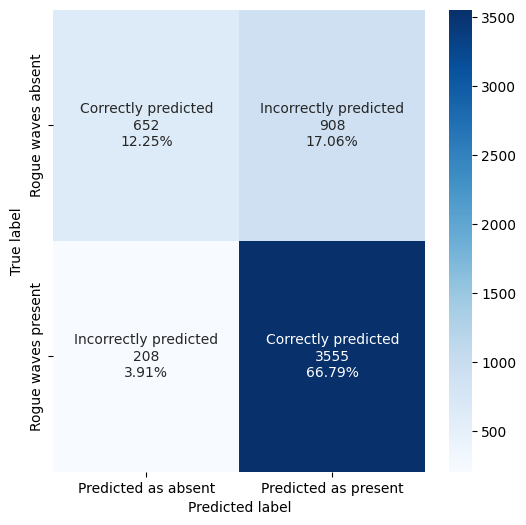

In [29]:
import seaborn as sns
group_names = ['Correctly predicted','Incorrectly predicted',\
                'Incorrectly predicted','Correctly predicted']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                        confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
yaxislabels = ['Rogue waves absent','Rogue waves present']
xaxislabels = ['Predicted as absent','Predicted as present']
plt.figure(figsize=[6,6])
s = sns.heatmap(confusion_matrix, annot=labels, yticklabels=yaxislabels, xticklabels=xaxislabels, fmt='', cmap='Blues')
s.set_xlabel("Predicted label", fontsize = 10)
s.set_ylabel("True label", fontsize=10)